In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

In [3]:
df = pd.read_excel('/Users/raulguzman/Documents/Escuela/Septimo/proyectos/IA-Avanzada-Modulo-2/IA-Avanzada-Modulo-2/dataset_carros.xlsx')
df

,Peso (kg),Tiempo de vuelta (s),Carro de carreras
0,1099.632095,63.771502,No
1,1560.571445,136.369249,No
2,1385.595153,97.722718,Sí
3,1278.926787,121.028483,Sí
4,924.814912,168.907977,No
...,...,...,...
95,1195.036477,101.905149,Sí
96,1218.186264,147.114681,Sí
97,1142.032815,167.653231,No
98,820.335301,166.450371,Sí


In [4]:
x =np.array(df['Peso (kg)'])
y =np.array(df['Tiempo de vuelta (s)'])
carro = np.array(df['Carro de carreras'])

# Separar los datos en entrenamiento y prueba.
x_train, x_test, y_train, y_test, carro_train, carro_test = train_test_split(x, y, carro, test_size=0.3, random_state=42)

In [18]:
print(np.unique(carro_train, return_counts=True))

(array(['No', 'Sí'], dtype=object), array([39, 31]))


In [19]:
#Parametros iniciales 

m = 0
b = 0
epochs = 10000
alpha = 0.0000001
tolerance = 1e-6
n_t = len(x_train)

In [20]:
#Algoritmo de descenso de gradiente 

for epoch in range(epochs):
    # Calculo de la prediccion y el error
    y_pred = m * x_train + b
    error = y_pred - y_train
    # Calculo del gradiente 
    grad_m = (1/n_t) * sum(error * x_train)
    grad_b = (1/n_t) * sum(error)
    # Actualizacion de los parametros
    m = m - alpha * grad_m
    b = b - alpha * grad_b
    #Verificar la convergencia
    if abs(alpha*grad_m) < tolerance and abs(alpha * grad_b) < tolerance:
        print('Converge en la iteracion:', epoch)
        break
    #Imprimir valores de los parametros cada 100 iteraciones
    if epoch % 100 == 0:
        print(f'Iteracion: {epoch+1}, m = {m}, b = {b}')


Iteracion: 1, m = 0.014029234268391613, b = 1.1920119174298025e-05
Converge en la iteracion: 62


In [21]:
#Resultados del modelo en los datos de etrenamiento
print(f'La pendiente es: {m}')
print(f'La interseccion es: {b}')

La pendiente es: 0.09798449585274949
La interseccion es: 0.00010561126577991594


In [22]:
etiquietas = print(np.unique(carro_train))
print(f"Etiquetas: {etiquietas}")

['No' 'Sí']
Etiquetas: None


In [25]:
#Clasificador
pred_train = m * x_train + b  # Predicciones para los datos de entrenamiento
clasificador_carr_t = np.where(y_train > pred_train, "Sí", "No")
matriz = confusion_matrix(carro_train, clasificador_carr_t, labels=["Sí", "No"])
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["Carro de carreras", "No es carro de carreras"])


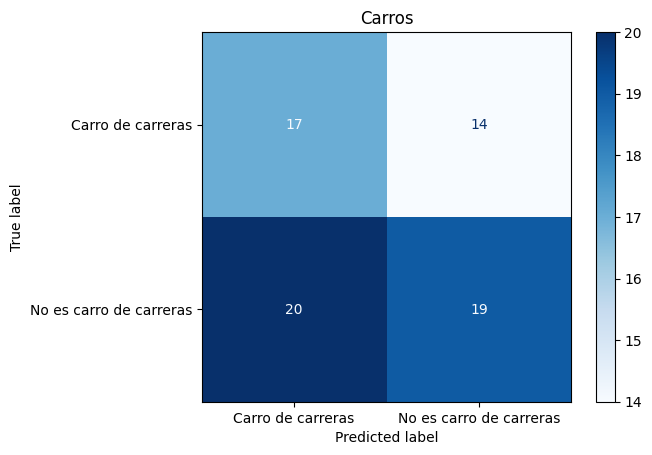

In [26]:
disp = disp.plot(cmap=plt.cm.Blues)
plt.title("Carros")
plt.show()

In [27]:
# Precision, recall y f1-score
precision = precision_score(carro_train, clasificador_carr_t, pos_label="Sí")
recall = recall_score(carro_train, clasificador_carr_t, pos_label="Sí")
f1 = f1_score(carro_train, clasificador_carr_t, pos_label="Sí")

In [28]:
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Precision: 0.4594594594594595
Recall: 0.5483870967741935
F1-score: 0.5


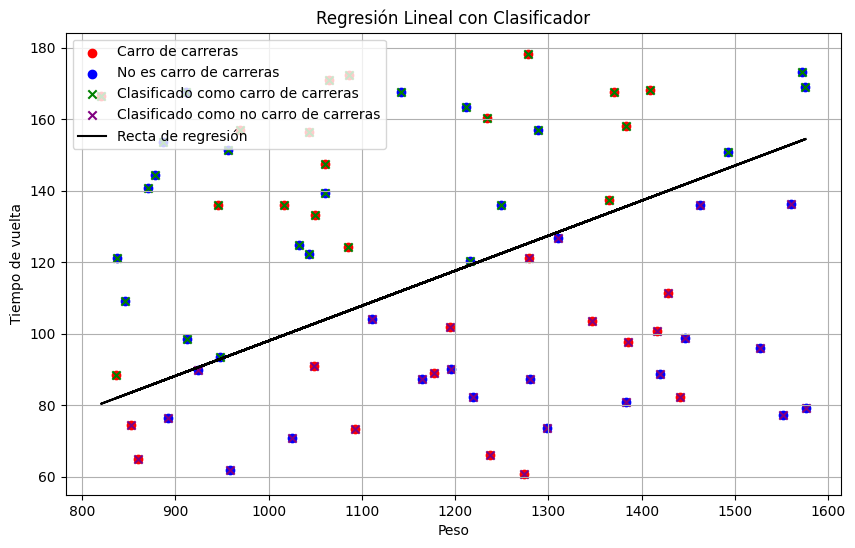

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train[carro_train == 'Sí'], y_train[carro_train == 'Sí'], color='red', label='Carro de carreras')
plt.scatter(x_train[carro_train == 'No'], y_train[carro_train == 'No'], color='blue', label='No es carro de carreras')
plt.scatter(x_train[clasificador_carr_t == 'Sí'], y_train[clasificador_carr_t == 'Sí'], color='green',marker='x', label='Clasificado como carro de carreras')
plt.scatter(x_train[clasificador_carr_t == 'No'], y_train[clasificador_carr_t == 'No'], color='purple',marker='x', label='Clasificado como no carro de carreras')
plt.plot(x_train,pred_train, color='black', label='Recta de regresión')

plt.xlabel('Peso')
plt.ylabel('Tiempo de vuelta')
plt.title('Regresión Lineal con Clasificador')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
#Resultados del modelo en los datos de prueba
pred_test = m * x_test + b  # Predicciones para los datos de prueba
clasificador_carr_test = np.where(y_test > pred_test, "Sí", "No")

matriz_test = confusion_matrix(carro_test, clasificador_carr_test, labels=["Sí", "No"])
disp_test = ConfusionMatrixDisplay(confusion_matrix=matriz_test, display_labels=["Carro de carreras", "No es carro de carreras"])

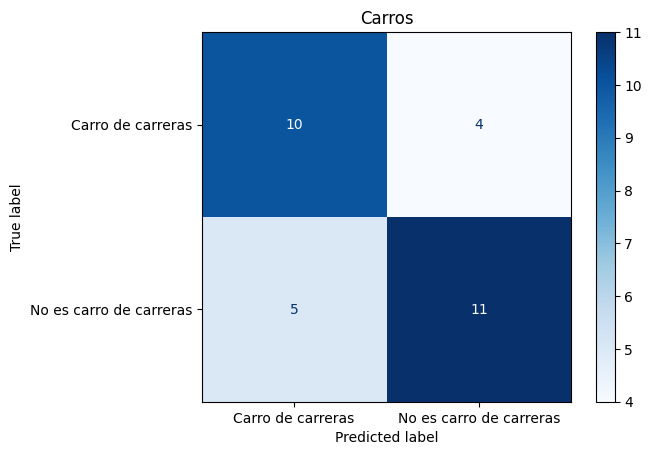

In [33]:
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Carros")
plt.show()

In [34]:
#Precision, recall y f1-score
precision = precision_score(carro_test, clasificador_carr_test, pos_label="Sí")
recall = recall_score(carro_test, clasificador_carr_test, pos_label="Sí")
f1 = f1_score(carro_test, clasificador_carr_test, pos_label="Sí")

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Precision: 0.6666666666666666
Recall: 0.7142857142857143
F1-score: 0.6896551724137931


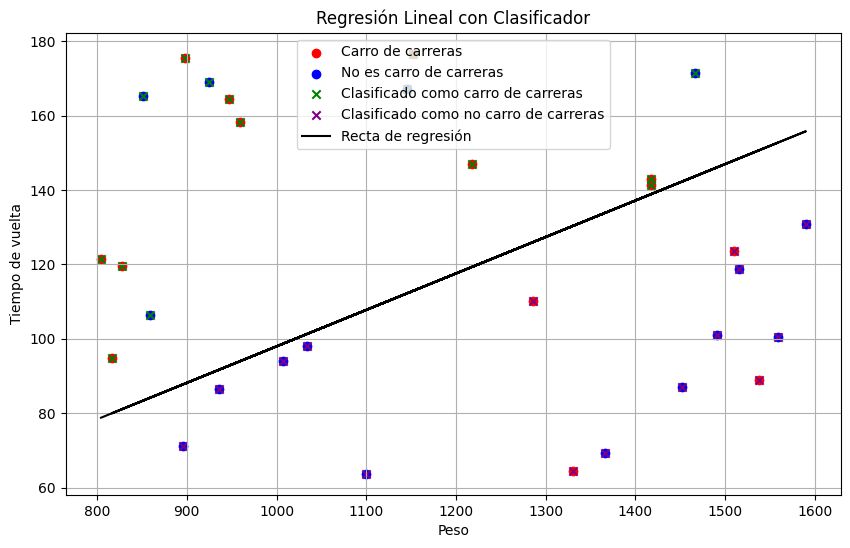

In [35]:
# Hola
plt.figure(figsize=(10, 6))
plt.scatter(x_test[carro_test == 'Sí'], y_test[carro_test == 'Sí'], color='red', label='Carro de carreras')
plt.scatter(x_test[carro_test == 'No'], y_test[carro_test == 'No'], color='blue', label='No es carro de carreras')
plt.scatter(x_test[clasificador_carr_test == 'Sí'], y_test[clasificador_carr_test == 'Sí'], color='green',marker='x', label='Clasificado como carro de carreras')
plt.scatter(x_test[clasificador_carr_test == 'No'], y_test[clasificador_carr_test == 'No'], color='purple',marker='x', label='Clasificado como no carro de carreras')
plt.plot(x_test,pred_test, color='black', label='Recta de regresión')

plt.xlabel('Peso')
plt.ylabel('Tiempo de vuelta')
plt.title('Regresión Lineal con Clasificador')
plt.legend()
plt.grid(True)
plt.show()